# Li-ion Battery Aging Datasets (NASA): Data exploration

In this notebook, we take a closer look at the (processed csv) data

Reference:
B. Saha and K. Goebel (2007). "Battery Data Set", NASA Prognostics Data Repository, NASA Ames Research Center, Moffett Field, CA

```
Author: Cedric Yu
Last modified: 20230105
```

In [44]:
# Load the "autoreload" extension so that code can change
import os
import pandas as pd
import numpy as np

%load_ext autoreload
# Always reload modules so that as you change code in src, it gets loaded
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load processed battery data

In [2]:
charge_filepath = '../../li_ion_battery_aging_nasa/data/processed/1. BatteryAgingARC-FY08Q4/B0005_charge.csv'
discharge_filepath = '../../li_ion_battery_aging_nasa/data/processed/1. BatteryAgingARC-FY08Q4/B0005_discharge.csv'
impedance_filepath = '../../li_ion_battery_aging_nasa/data/processed/1. BatteryAgingARC-FY08Q4/B0005_impedance.csv'


In [15]:
df_charge_cycles = pd.read_csv(charge_filepath)
df_discharge_cycles = pd.read_csv(discharge_filepath)
df_impedance_cycles = pd.read_csv(impedance_filepath)


### Charge cycles

In [6]:
df_charge_cycles.head()


,cycle_num,ambient_temperature,cycle_time_start,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time
0,1,24,2008-04-02 13:08:17,3.873017,-0.001201,24.655358,0.000,0.003,0.000
1,1,24,2008-04-02 13:08:17,3.479394,-4.030268,24.666480,-4.036,1.570,2.532
2,1,24,2008-04-02 13:08:17,4.000588,1.512731,24.675394,1.500,4.726,5.500
3,1,24,2008-04-02 13:08:17,4.012395,1.509063,24.693865,1.500,4.742,8.344
4,1,24,2008-04-02 13:08:17,4.019708,1.511318,24.705069,1.500,4.753,11.125


In [7]:
df_charge_cycles.tail()


,cycle_num,ambient_temperature,cycle_time_start,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time
541168,170,24,2008-05-28 11:09:42,0.236356,-0.003484,23.372048,0.000,0.003,0.000
541169,170,24,2008-05-28 11:09:42,0.003365,-0.001496,23.369434,0.000,0.003,2.547
541170,170,24,2008-05-28 11:09:42,4.985137,0.000506,23.386535,0.000,5.002,5.500
541171,170,24,2008-05-28 11:09:42,4.984720,0.000442,23.386983,-0.002,5.002,8.312
541172,170,24,2008-05-28 11:09:42,4.213440,-0.000734,23.385061,-0.002,4.229,12.656


In [17]:
df_charge_cycles = df_charge_cycles.sort_values(['cycle_num', 'Time'], ascending=True)


In [19]:
df_charge_cycles[df_charge_cycles['cycle_num'] == 1].tail()


,cycle_num,ambient_temperature,cycle_time_start,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time
784,1,24,2008-04-02 13:08:17,4.190822,-0.003391,24.539397,0.0,0.003,7525.782
785,1,24,2008-04-02 13:08:17,4.191299,-0.000942,24.532498,0.0,0.003,7543.797
786,1,24,2008-04-02 13:08:17,4.191388,-0.000351,24.518673,0.0,0.003,7561.750
787,1,24,2008-04-02 13:08:17,4.191453,-0.001856,24.514363,0.0,0.003,7579.813
788,1,24,2008-04-02 13:08:17,4.191078,-0.002892,24.507040,0.0,0.003,7597.875


Cumulative time for charging cycles only

In [28]:
df_prev_cycle_duration = df_charge_cycles[['cycle_num', 'Time']].groupby(['cycle_num']).last().reset_index()
df_prev_cycle_duration.columns = ['cycle_num', 'prev_cycle_duration']
df_prev_cycle_duration['prev_cycle_duration'] = df_prev_cycle_duration['prev_cycle_duration'].shift(fill_value=0)
df_prev_cycle_duration['prev_cycle_duration'] = df_prev_cycle_duration['prev_cycle_duration'].cumsum()


In [29]:
df_charge_cycles_ = pd.merge(df_charge_cycles, df_prev_cycle_duration, on='cycle_num', how='inner').drop_duplicates()
df_charge_cycles_['Time_agg'] = df_charge_cycles_['prev_cycle_duration'] + df_charge_cycles_['Time']


In [35]:
df_charge_cycles_.tail()


,cycle_num,ambient_temperature,cycle_time_start,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,prev_cycle_duration,Time_agg
541168,170,24,2008-05-28 11:09:42,0.236356,-0.003484,23.372048,0.000,0.003,0.000,1759651.151,1759651.151
541169,170,24,2008-05-28 11:09:42,0.003365,-0.001496,23.369434,0.000,0.003,2.547,1759651.151,1759653.698
541170,170,24,2008-05-28 11:09:42,4.985137,0.000506,23.386535,0.000,5.002,5.500,1759651.151,1759656.651
541171,170,24,2008-05-28 11:09:42,4.984720,0.000442,23.386983,-0.002,5.002,8.312,1759651.151,1759659.463
541172,170,24,2008-05-28 11:09:42,4.213440,-0.000734,23.385061,-0.002,4.229,12.656,1759651.151,1759663.807


<AxesSubplot: xlabel='Time_agg'>

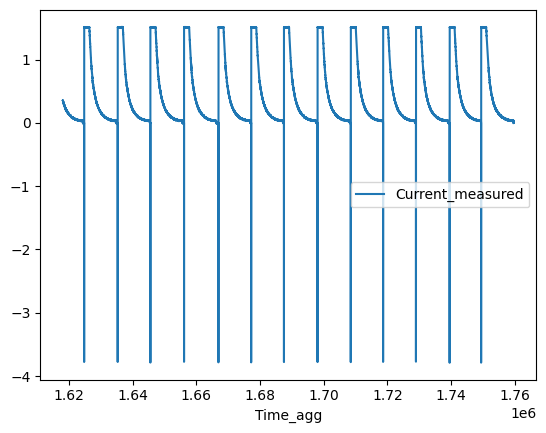

In [38]:
df_charge_cycles_.iloc[-50000:].plot(x='Time_agg', y='Current_measured')


### Discharge cycle

In [39]:
df_discharge_cycles.head()


,cycle_num,ambient_temperature,cycle_time_start,Capacity,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time
0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000
1,1,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781
2,1,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703
3,1,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781
4,1,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922


Battery capacity measured in each discharge cycle. This is one possible target label.

<AxesSubplot: xlabel='cycle_num'>

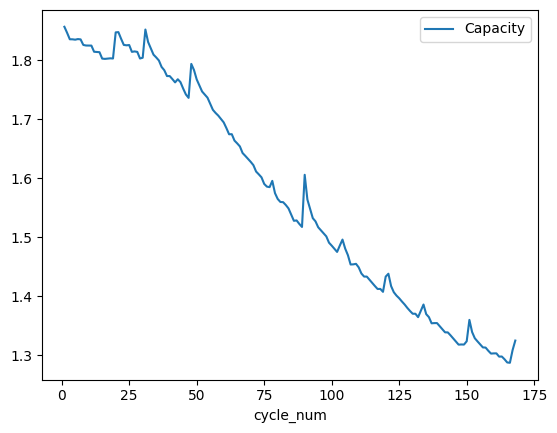

In [40]:
df_discharge_cycles.plot(x='cycle_num', y='Capacity')


### Re-combine charge and discharge cycle data

From original readme files: in discharge cycles, `Current_load` and `Voltage_load` should be `Current_charge` and `Voltage_charge` respectively. They are respectively the current and voltage measured at load. In charge cycles they are measured at the charger.

In [45]:
df_charge_cycles['type'] = 'charge'
df_charge_cycles['Capacity'] = np.nan


Rename `Current_load` and `Voltage_load` into `Current_charge` and `Voltage_charge`

In [50]:
df_discharge_cycles['type'] = 'discharge'
df_discharge_cycles = df_discharge_cycles.rename(
    columns={'Current_load': 'Current_charge', 'Voltage_load': 'Voltage_charge'})


In [51]:
df = pd.concat([df_charge_cycles, df_discharge_cycles])
df = df.sort_values(['cycle_time_start', 'cycle_num', 'Time'], ascending=True)
df.head(10)


,cycle_num,ambient_temperature,cycle_time_start,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,type,Capacity
0,1,24,2008-04-02 13:08:17,3.873017,-0.001201,24.655358,0.000,0.003,0.000,charge,NaN
1,1,24,2008-04-02 13:08:17,3.479394,-4.030268,24.666480,-4.036,1.570,2.532,charge,NaN
2,1,24,2008-04-02 13:08:17,4.000588,1.512731,24.675394,1.500,4.726,5.500,charge,NaN
3,1,24,2008-04-02 13:08:17,4.012395,1.509063,24.693865,1.500,4.742,8.344,charge,NaN
4,1,24,2008-04-02 13:08:17,4.019708,1.511318,24.705069,1.500,4.753,11.125,charge,NaN
5,1,24,2008-04-02 13:08:17,4.025409,1.512779,24.718140,1.498,4.758,13.891,charge,NaN
6,1,24,2008-04-02 13:08:17,4.030636,1.511838,24.731144,1.500,4.764,16.672,charge,NaN
7,1,24,2008-04-02 13:08:17,4.035349,1.510245,24.741290,1.500,4.769,19.500,charge,NaN
8,1,24,2008-04-02 13:08:17,4.039716,1.507796,24.759011,1.500,4.775,22.282,charge,NaN
9,1,24,2008-04-02 13:08:17,4.043541,1.507322,24.766891,1.500,4.775,25.063,charge,NaN


### Charge and discharge cycles alternate, as expected

In [52]:
df[['cycle_time_start', 'type']].groupby(['cycle_time_start']).first()


,type
cycle_time_start,
2008-04-02 13:08:17,charge
2008-04-02 15:25:41,discharge
2008-04-02 16:37:51,charge
2008-04-02 19:43:48,discharge
2008-04-02 20:55:40,charge
...,...
2008-05-26 21:41:33,charge
2008-05-27 15:52:41,discharge
2008-05-27 17:53:59,charge


In [77]:
df_cum_time = df[['cycle_time_start', 'Time']].groupby(['cycle_time_start']).last().reset_index()
df_cum_time['Time'] = df_cum_time['Time'].shift(fill_value=0)
df_cum_time['Time'] = df_cum_time['Time'].cumsum()
df_cum_time = df_cum_time.rename(columns={'Time': 'cum_time'})
df_cum_time


,cycle_time_start,cum_time
0,2008-04-02 13:08:17,0.000
1,2008-04-02 15:25:41,7597.875
2,2008-04-02 16:37:51,11288.109
3,2008-04-02 19:43:48,21804.109
4,2008-04-02 20:55:40,25476.453
...,...,...
333,2008-05-26 21:41:33,2259684.149
334,2008-05-27 15:52:41,2269576.524
335,2008-05-27 17:53:59,2272378.540
336,2008-05-27 20:45:42,2282590.774


In [82]:
df_ = pd.merge(df, df_cum_time,
               on='cycle_time_start', how='inner').drop_duplicates()
df_['time'] = df_['Time'] + df_['cum_time']
df_ = df_.drop(['cycle_num', 'cycle_time_start',
                'Time', 'cum_time', 'ambient_temperature'], axis=1)
df_.head()


,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,type,Capacity,time
0,3.873017,-0.001201,24.655358,0.000,0.003,charge,NaN,0.000
1,3.479394,-4.030268,24.666480,-4.036,1.570,charge,NaN,2.532
2,4.000588,1.512731,24.675394,1.500,4.726,charge,NaN,5.500
3,4.012395,1.509063,24.693865,1.500,4.742,charge,NaN,8.344
4,4.019708,1.511318,24.705069,1.500,4.753,charge,NaN,11.125


In [62]:
df_.tail(10)


,cycle_num,ambient_temperature,cycle_time_start,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,type,Capacity,cum_time,Time_cum
591448,168,24,2008-05-27 20:45:42,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312,discharge,1.325079,2282590.774,2285372.086
591449,168,24,2008-05-27 20:45:42,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062,discharge,1.325079,2282590.774,2285381.836
591450,168,24,2008-05-27 20:45:42,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828,discharge,1.325079,2282590.774,2285391.602
591451,168,24,2008-05-27 20:45:42,3.587336,0.001219,34.565580,0.0006,0.000,2810.640,discharge,1.325079,2282590.774,2285401.414
591452,168,24,2008-05-27 20:45:42,3.589937,-0.000583,34.405920,0.0006,0.000,2820.390,discharge,1.325079,2282590.774,2285411.164
591453,170,24,2008-05-28 11:09:42,0.236356,-0.003484,23.372048,0.0000,0.003,0.000,charge,NaN,2285411.164,2285411.164
591454,170,24,2008-05-28 11:09:42,0.003365,-0.001496,23.369434,0.0000,0.003,2.547,charge,NaN,2285411.164,2285413.711
591455,170,24,2008-05-28 11:09:42,4.985137,0.000506,23.386535,0.0000,5.002,5.500,charge,NaN,2285411.164,2285416.664
591456,170,24,2008-05-28 11:09:42,4.984720,0.000442,23.386983,-0.0020,5.002,8.312,charge,NaN,2285411.164,2285419.476
591457,170,24,2008-05-28 11:09:42,4.213440,-0.000734,23.385061,-0.0020,4.229,12.656,charge,NaN,2285411.164,2285423.820


<AxesSubplot: xlabel='time'>

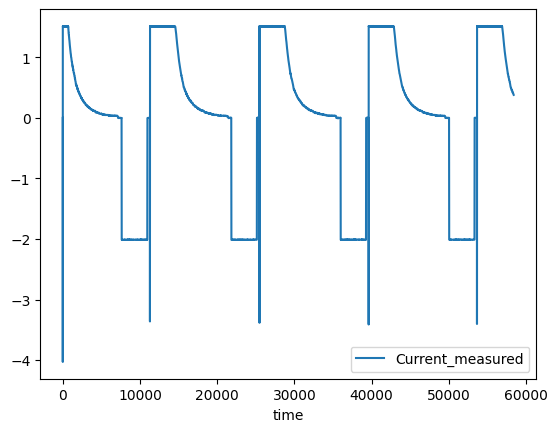

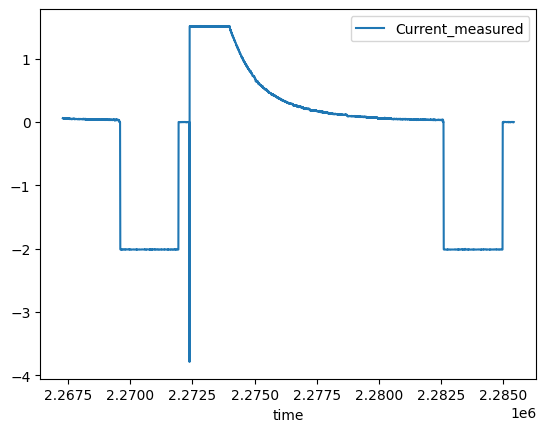

In [83]:
df_.iloc[:5000].plot(x='time', y='Current_measured')
df_.iloc[-5000:].plot(x='time', y='Current_measured')


<AxesSubplot: xlabel='time'>

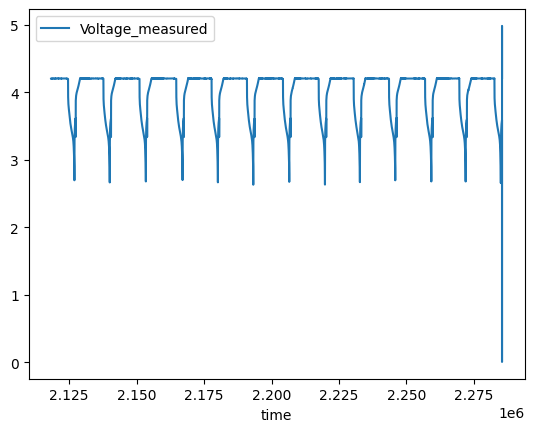

: 

In [84]:
df_.iloc[-50000:].plot(x='time', y='Voltage_measured')
